In [1]:
import plotly
plotly.offline.init_notebook_mode()
import pandas as pd
import numpy as np 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw_data_url = 'https://raw.githubusercontent.com/andrewmejia600/MSDS7331/master/RAW_DATA/ml_clean_data.csv'

In [3]:
ml_data = pd.read_csv(raw_data_url)

In [4]:
ml_data.head(n=5)

age  fnlwght  education_num_yr  cap_gain  cap_loss  hours_per_week  \
0   39    77516                13      2174         0              40   
1   50    83311                13         0         0              13   
2   38   215646                 9         0         0              40   
3   53   234721                 7         0         0              40   
4   28   338409                13         0         0              40   

   income_outcome  workclass_Federal-gov  workclass_Local-gov  \
0               0                      0                    0   
1               0                      0                    0   
2               0                      0                    0   
3               0                      0                    0   
4               0                      0                    0   

   workclass_Private  ...  origin_descent_us_1  level_of_employ_FT  \
0                  0  ...                    1                   1   
1                  0  ...                    1                   0   
2                  1  ...                    1                   1   
3                  1  ...                    1                   1   
4                  1  ...                    0                   1   

   level_of_employ_PT  education_level_ASC  education_level_CGRAD  \
0                   0                    0                      1   
1                   1                    0                      1   
2                   0                    0                      0   
3                   0                    0                      0   
4                   0                    0                      1   

   education_level_HS  education_level_HSGRAD  education_level_PGRAD  \
0                   0                       0                      0   
1                   0                       0                      0   
2                   0                       1                      0   
3                   1                       0                      0   
4                   0                       0                      0   

   education_level_PRIM  education_level_SC  
0                     0                   0  
1                     0                   0  
2                     0                   0  
3                     0                   0  
4                     0                   0  

[5 rows x 54 columns]

In [5]:
ml_data.dtypes

age                                     int64
fnlwght                                 int64
education_num_yr                        int64
cap_gain                                int64
cap_loss                                int64
hours_per_week                          int64
income_outcome                          int64
workclass_Federal-gov                   int64
workclass_Local-gov                     int64
workclass_Private                       int64
workclass_Self-emp-inc                  int64
workclass_Self-emp-not-inc              int64
workclass_State-gov                     int64
workclass_Without-pay                   int64
marital_status_Divorced                 int64
marital_status_Married-AF-spouse        int64
marital_status_Married-civ-spouse       int64
marital_status_Married-spouse-absent    int64
marital_status_Never-married            int64
marital_status_Separated                int64
marital_status_Widowed                  int64
occupation_Adm-clerical           

In [6]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30072 entries, 0 to 30071
Data columns (total 54 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   30072 non-null  int64
 1   fnlwght                               30072 non-null  int64
 2   education_num_yr                      30072 non-null  int64
 3   cap_gain                              30072 non-null  int64
 4   cap_loss                              30072 non-null  int64
 5   hours_per_week                        30072 non-null  int64
 6   income_outcome                        30072 non-null  int64
 7   workclass_Federal-gov                 30072 non-null  int64
 8   workclass_Local-gov                   30072 non-null  int64
 9   workclass_Private                     30072 non-null  int64
 10  workclass_Self-emp-inc                30072 non-null  int64
 11  workclass_Self-emp-not-inc            300

In [7]:
ml_df = ml_data.copy()

In [8]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
from sklearn.model_selection import ShuffleSplit
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


ML_std_clf = StandardScaler()
#removed some redundant dummy variables
if 'income_outcome' in ml_df:
    y = ml_df['income_outcome'].values 
    del ml_df['income_outcome'] 
    X = ml_df.values 
    

if 'level_of_employ_PT' in ml_df:
    del ml_df['level_of_employ_PT'] 
    X = ml_df.values 
    
if 'sex_Female' in ml_df:
    del ml_df['sex_Female'] 
    X = ml_df.values 
    
if 'origin_descent_us_0' in ml_df:
    del ml_df['origin_descent_us_0'] 
    X = ml_df.values 



num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


====Iteration 0  ====

Accuracy:  0.8418952618453865 

Confusion Matrix: 
      0    1
0  4175  338
1   613  889 

====Iteration 1  ====

Accuracy:  0.8478802992518704 

Confusion Matrix: 
      0    1
0  4186  310
1   605  914 

====Iteration 2  ====

Accuracy:  0.8522028262676642 

Confusion Matrix: 
      0    1
0  4205  338
1   551  921 



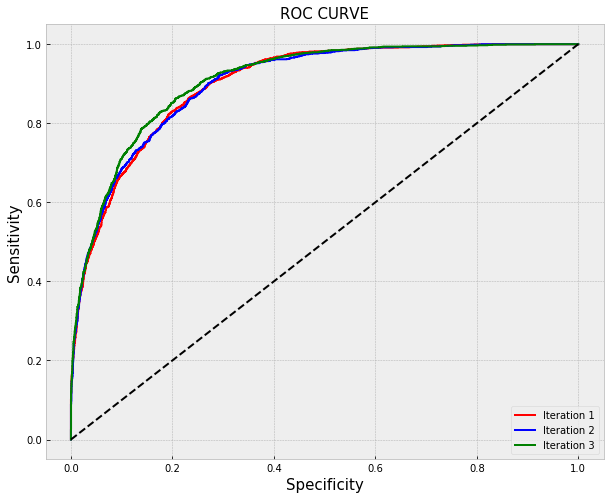

In [9]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import roc_auc_score, roc_curve

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)


lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' )
lr_clf_pipe = make_pipeline(StandardScaler(),lr_clf)


iter_num=0
weights = []

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf_pipe.fit(X_train,y_train)
    y_hat = lr_clf_pipe.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("Confusion Matrix: ")
    print (pd.DataFrame(conf),"\n")
    
    
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])

    
    
    prob = lr_clf_pipe.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
weights = np.array(weights)

In [10]:
weights

array([[ 3.73328202e-01,  6.53553996e-02,  9.13725047e-01,
         2.33202576e+00,  2.71098618e-01,  2.60804800e-01,
         9.24304973e-02, -2.57005543e-02,  3.60903828e-02,
         5.69939506e-02, -9.88787481e-02, -3.25071958e-02,
        -1.19958163e-01, -2.25946571e-01,  6.00392365e-02,
         6.91185553e-01, -8.24919809e-02, -4.95266402e-01,
        -9.61613474e-02, -6.48213880e-02, -1.43902163e-02,
        -2.04893458e-02,  1.64270165e-03,  2.55714156e-01,
        -1.99611969e-01, -1.55249758e-01, -8.63844801e-02,
        -2.53751305e-01, -2.49670814e-01,  1.76925118e-01,
         7.17857763e-02,  7.15503281e-02,  9.67359112e-02,
        -3.74702045e-02, -2.37000511e-02,  1.11680353e-01,
        -8.99832255e-02, -2.82390327e-01,  5.95603976e-02,
         2.84416398e-01,  4.22792769e-01,  4.66764802e-02,
         2.21694197e-01, -7.41917451e-02, -7.96990937e-02,
         6.73026157e-02,  3.74748623e-02, -6.92940307e-02,
         9.91968440e-02,  3.36177048e-02],
       [ 3.51

In [11]:


error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ml_df.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}
plotly.offline.iplot(fig)

Let's select the important variables from above and look at education_num_yr, cap_gain, and the levels of marital status 

In [14]:
Xnew = ml_df[['education_num_yr', 'cap_gain', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'sex_Male']].values

weights = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['education_num_yr', 'cap_gain', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'sex_Male'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}

plotly.offline.iplot(fig)

====Iteration 0  ====

Accuracy:  0.8380714879467996 

Confusion Matrix: 
      0    1
0  4230  294
1   680  811 

====Iteration 1  ====

Accuracy:  0.830091438071488 

Confusion Matrix: 
      0    1
0  4159  305
1   717  834 

====Iteration 2  ====

Accuracy:  0.8377389858686617 

Confusion Matrix: 
      0    1
0  4250  308
1   668  789 



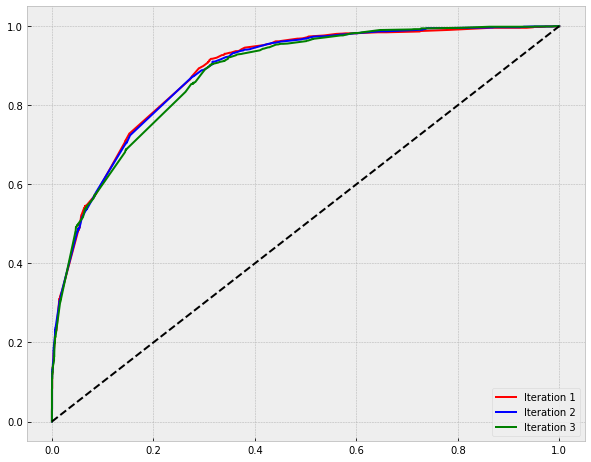

In [15]:
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    
    y_hat = lr_clf_pipe.predict(Xnew[test_indices])


    acc = mt.accuracy_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("Confusion Matrix: ")
    print (pd.DataFrame(conf),"\n")
    
    prob = lr_clf_pipe.predict_proba(Xnew[test_indices])
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y[test_indices], prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
    

In [16]:
ML_std_clf.fit(X_train) 
X_train_scaled = ML_std_clf.transform(X_train)

X_test_scaled = ML_std_clf.transform(X_test)


In [17]:

import time

t = time.process_time()

# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

elapsed_time = time.process_time() - t

print(elapsed_time)

accuracy: 0.8532003325020782
[[4237  306]
 [ 577  895]]
29.457553879


In [18]:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(8507, 50)
(8507,)
[4263 4244]


[[ 0.15509621  0.03172326  0.61088639  1.72072958  0.17165204  0.1495194
   0.05566352 -0.01027785  0.02735729  0.04951721 -0.0752838  -0.03733076
  -0.01111979 -0.05470385  0.02356797  0.26110769 -0.0439151  -0.22883495
  -0.0186952   0.01994694 -0.03207473 -0.00876585 -0.07256693  0.20743324
  -0.09801351 -0.09161176 -0.07101867 -0.15323    -0.10464283  0.15862322
   0.02950604  0.03775104  0.09591869 -0.06123023  0.18365412 -0.10695234
  -0.06378476 -0.15057899 -0.08909176  0.22663857  0.20125381  0.03357579
   0.14892016 -0.04947815  0.01295294  0.08173385 -0.02375754 -0.02297899
   0.11705657 -0.04314679]]


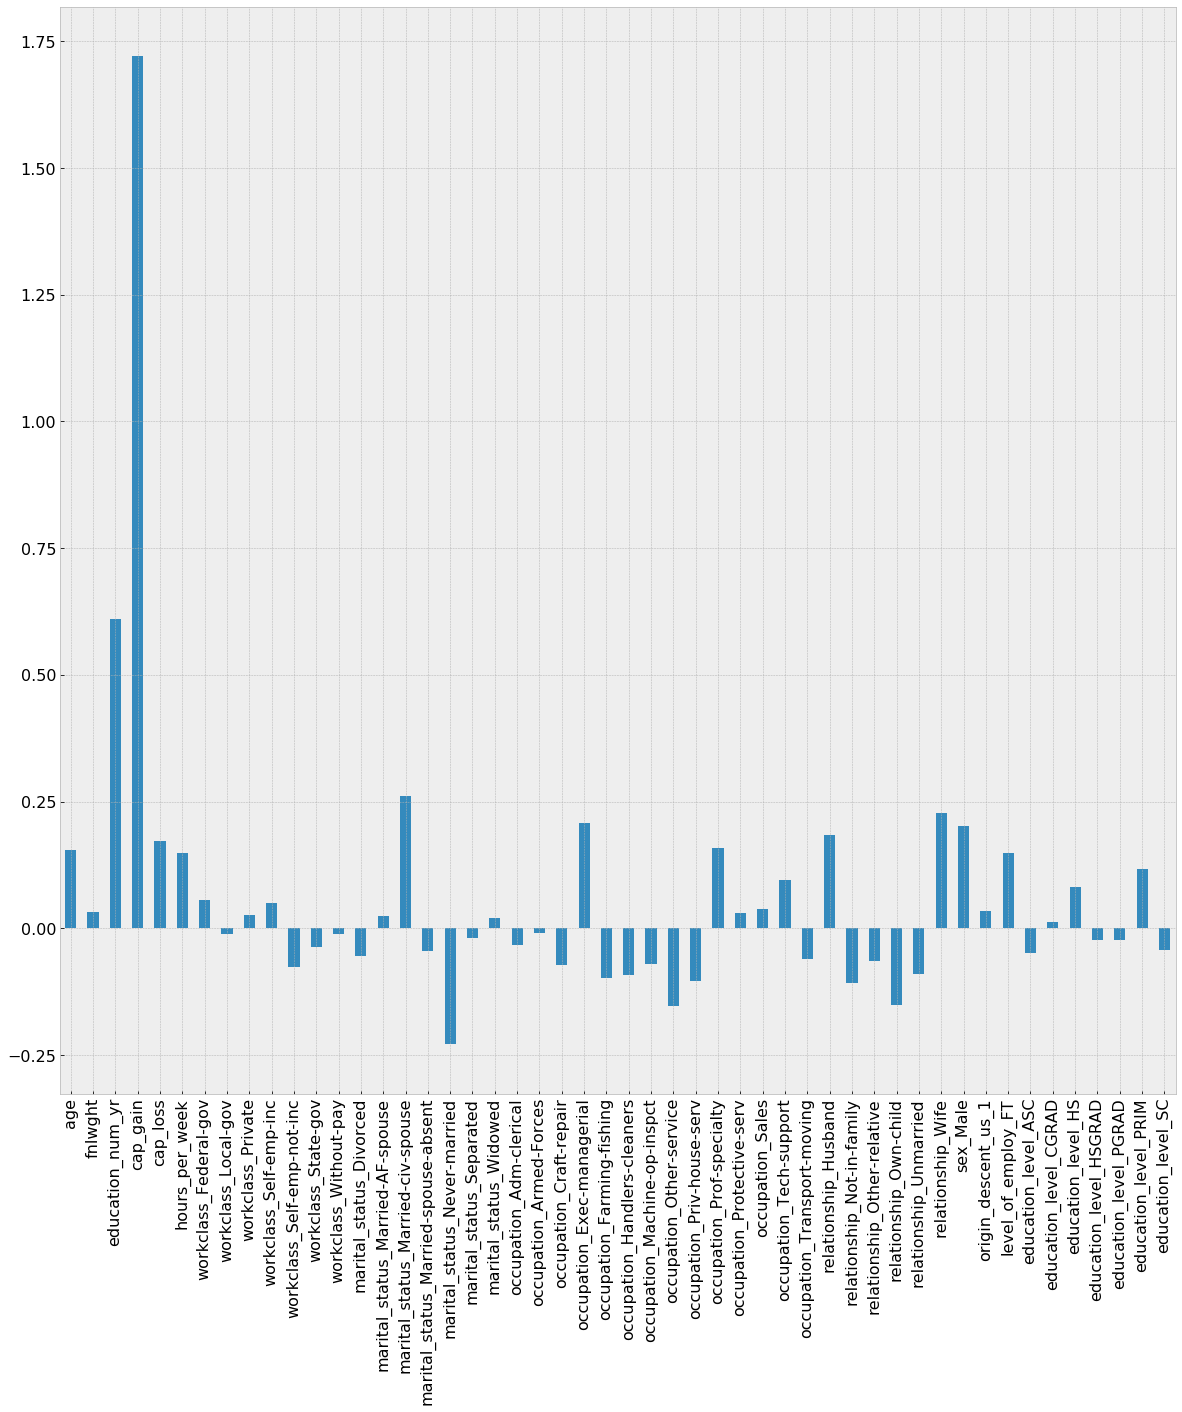

In [19]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=ml_df.columns)
weights.plot(kind='bar',figsize=(20,20), fontsize=16)

In [20]:
df_tested_on = ml_df.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['income_outcome'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
ml_df['income_outcome'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8507 entries, 11707 to 5794
Data columns (total 51 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   8507 non-null   int64
 1   fnlwght                               8507 non-null   int64
 2   education_num_yr                      8507 non-null   int64
 3   cap_gain                              8507 non-null   int64
 4   cap_loss                              8507 non-null   int64
 5   hours_per_week                        8507 non-null   int64
 6   workclass_Federal-gov                 8507 non-null   int64
 7   workclass_Local-gov                   8507 non-null   int64
 8   workclass_Private                     8507 non-null   int64
 9   workclass_Self-emp-inc                8507 non-null   int64
 10  workclass_Self-emp-not-inc            8507 non-null   int64
 11  workclass_State-gov                   8

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 720x288 with 0 Axes>

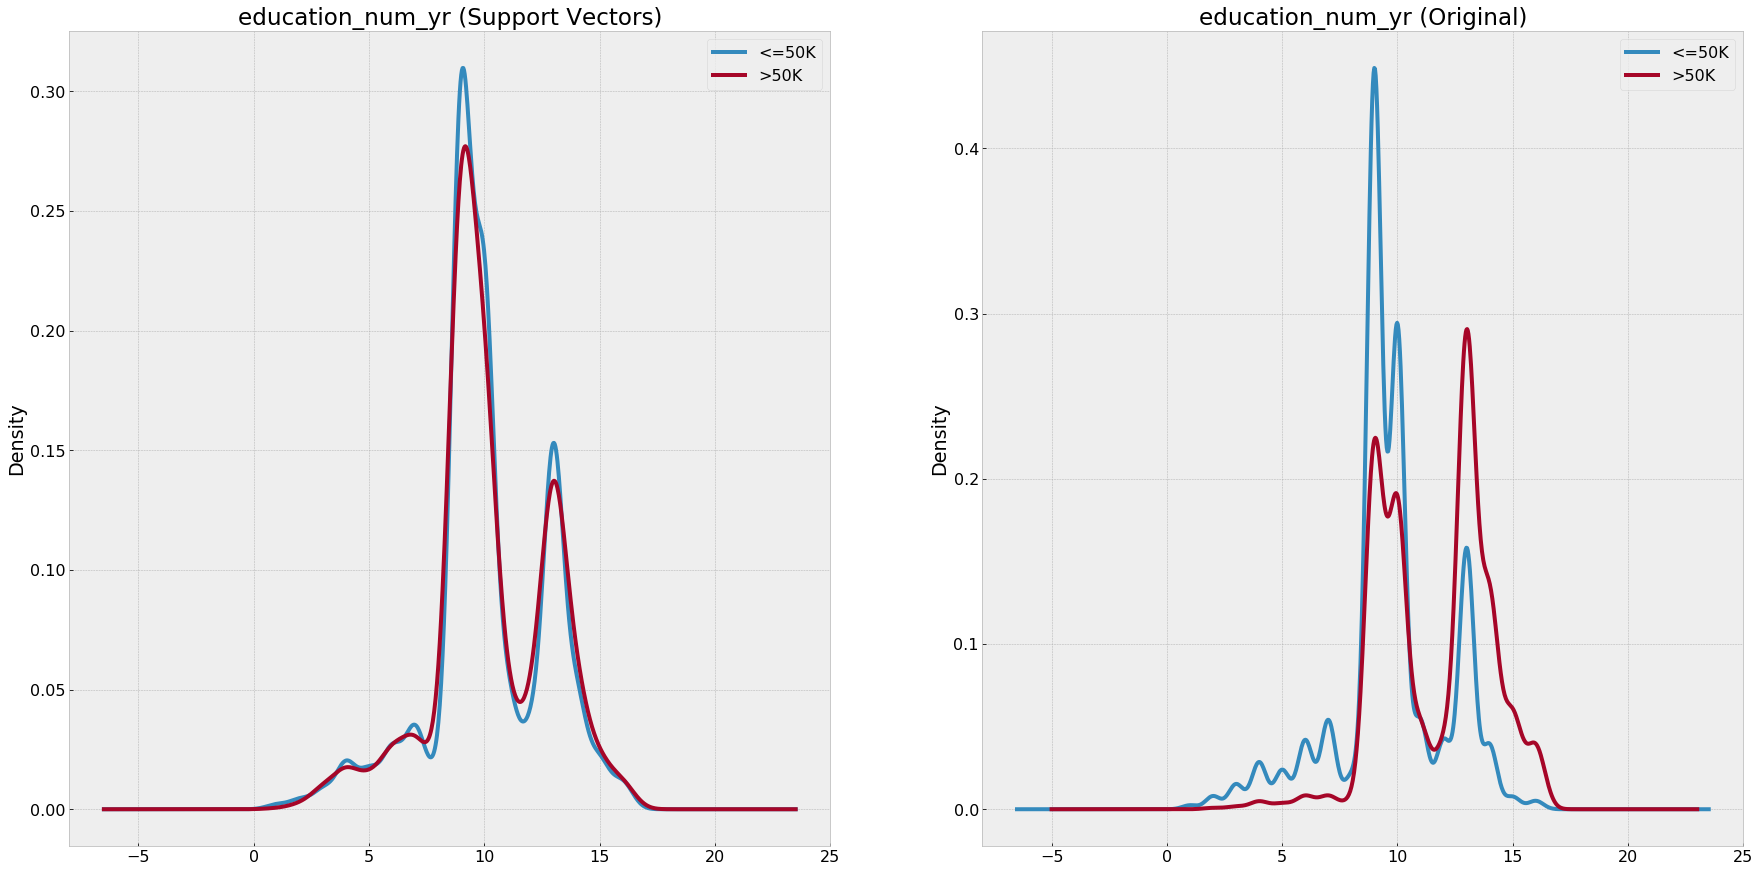

<Figure size 720x288 with 0 Axes>

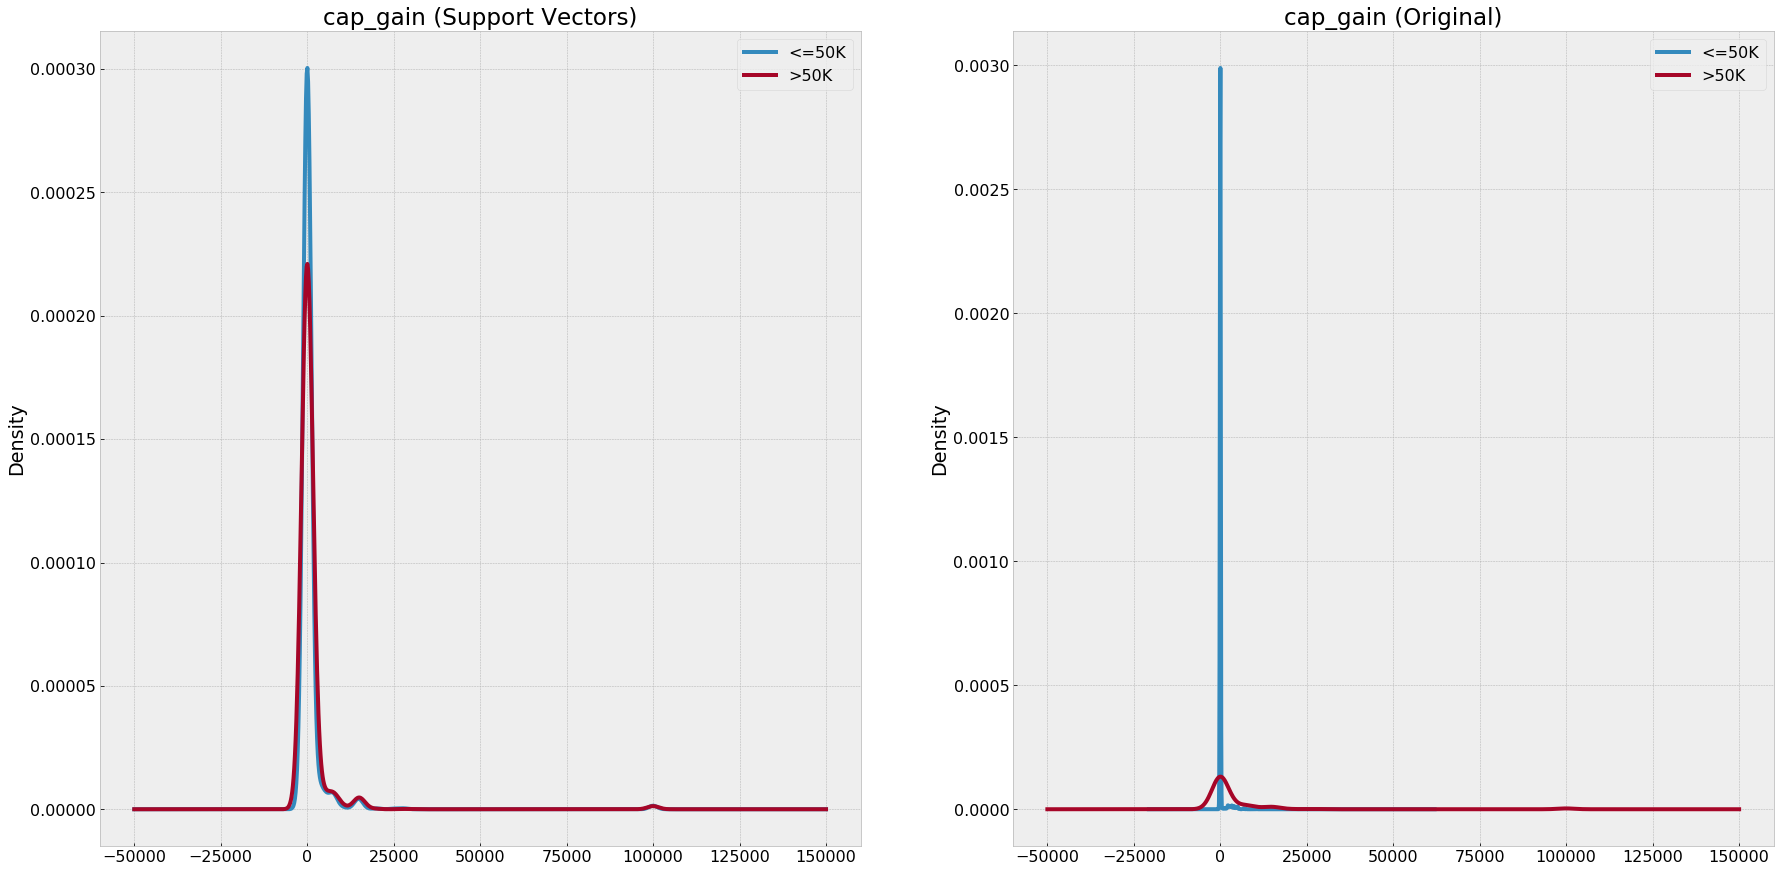

<Figure size 720x288 with 0 Axes>

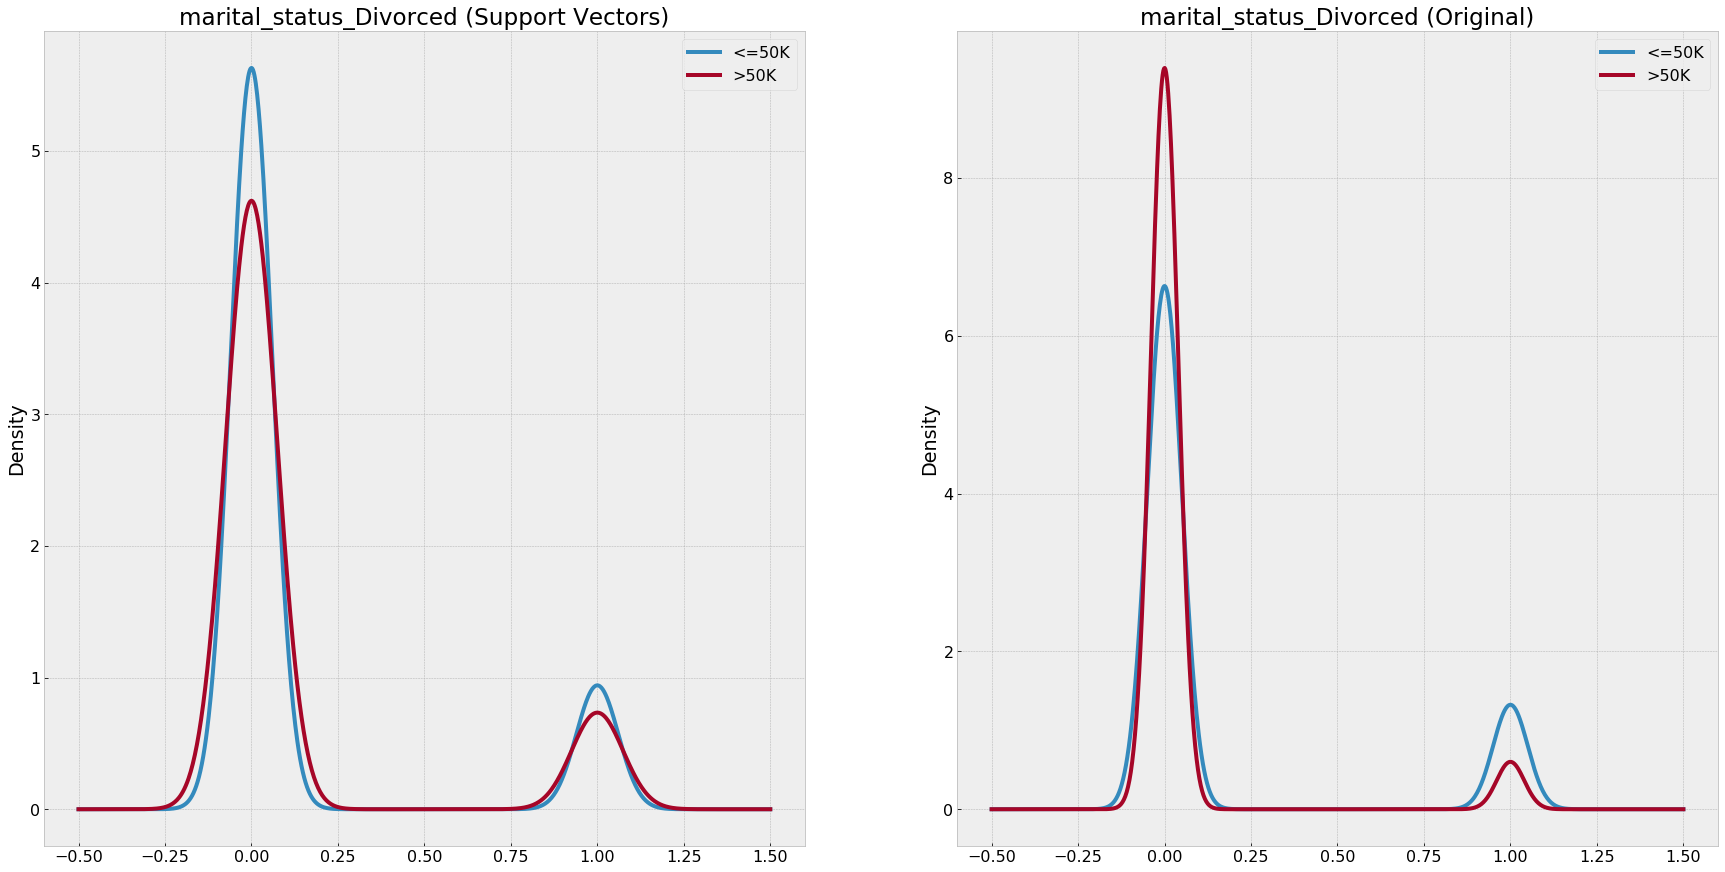

<Figure size 720x288 with 0 Axes>

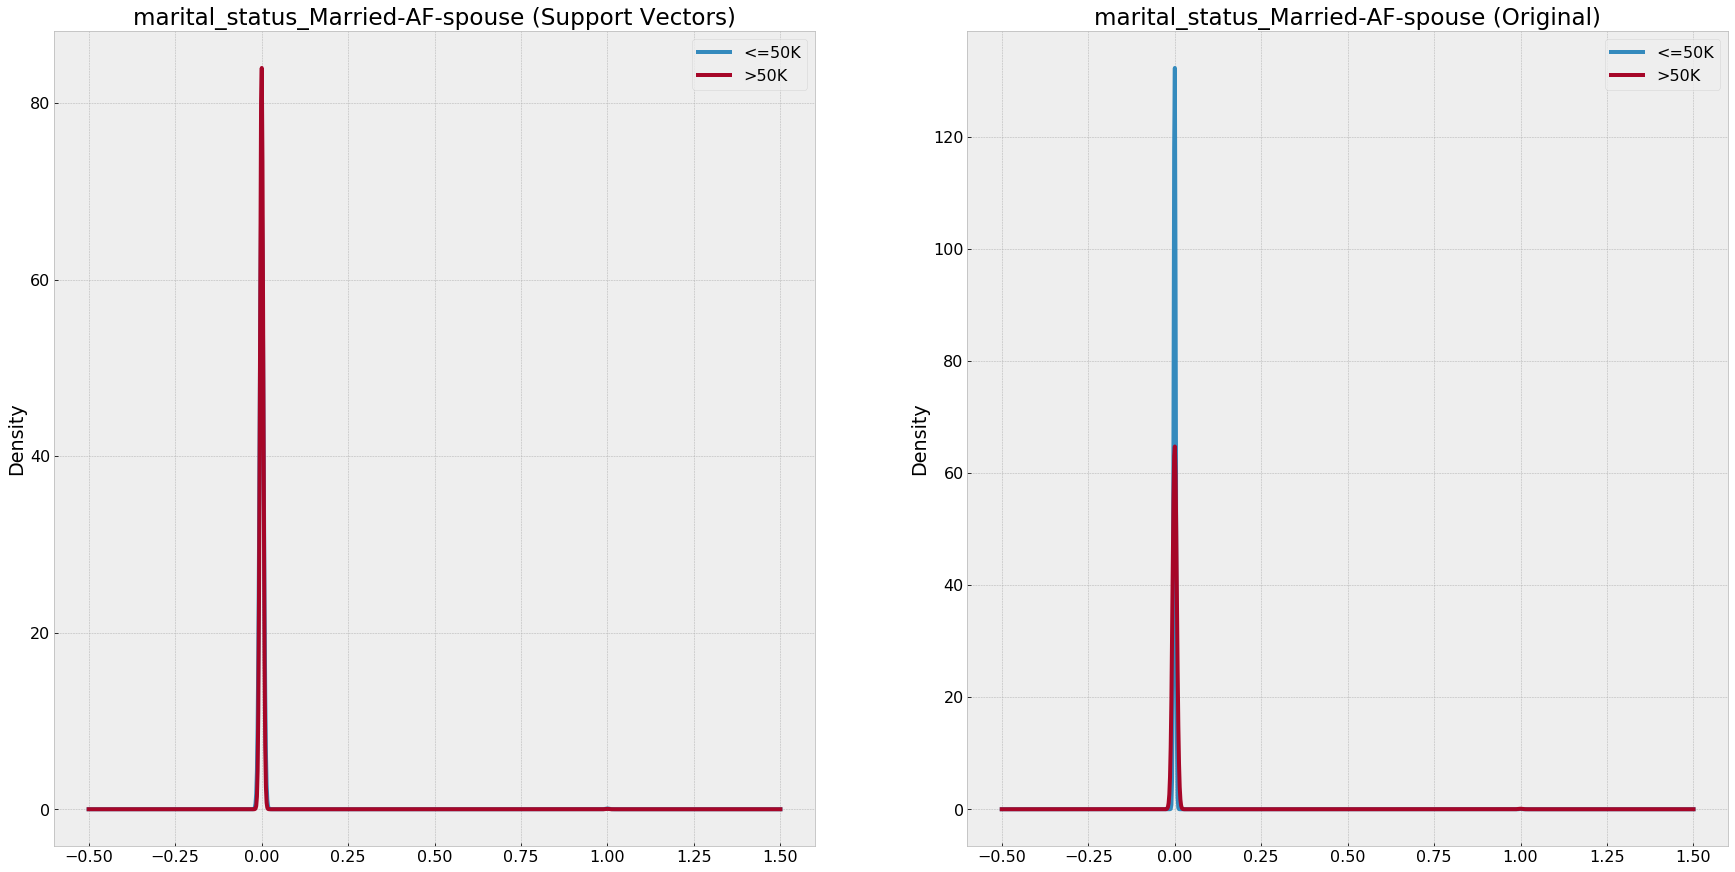

<Figure size 720x288 with 0 Axes>

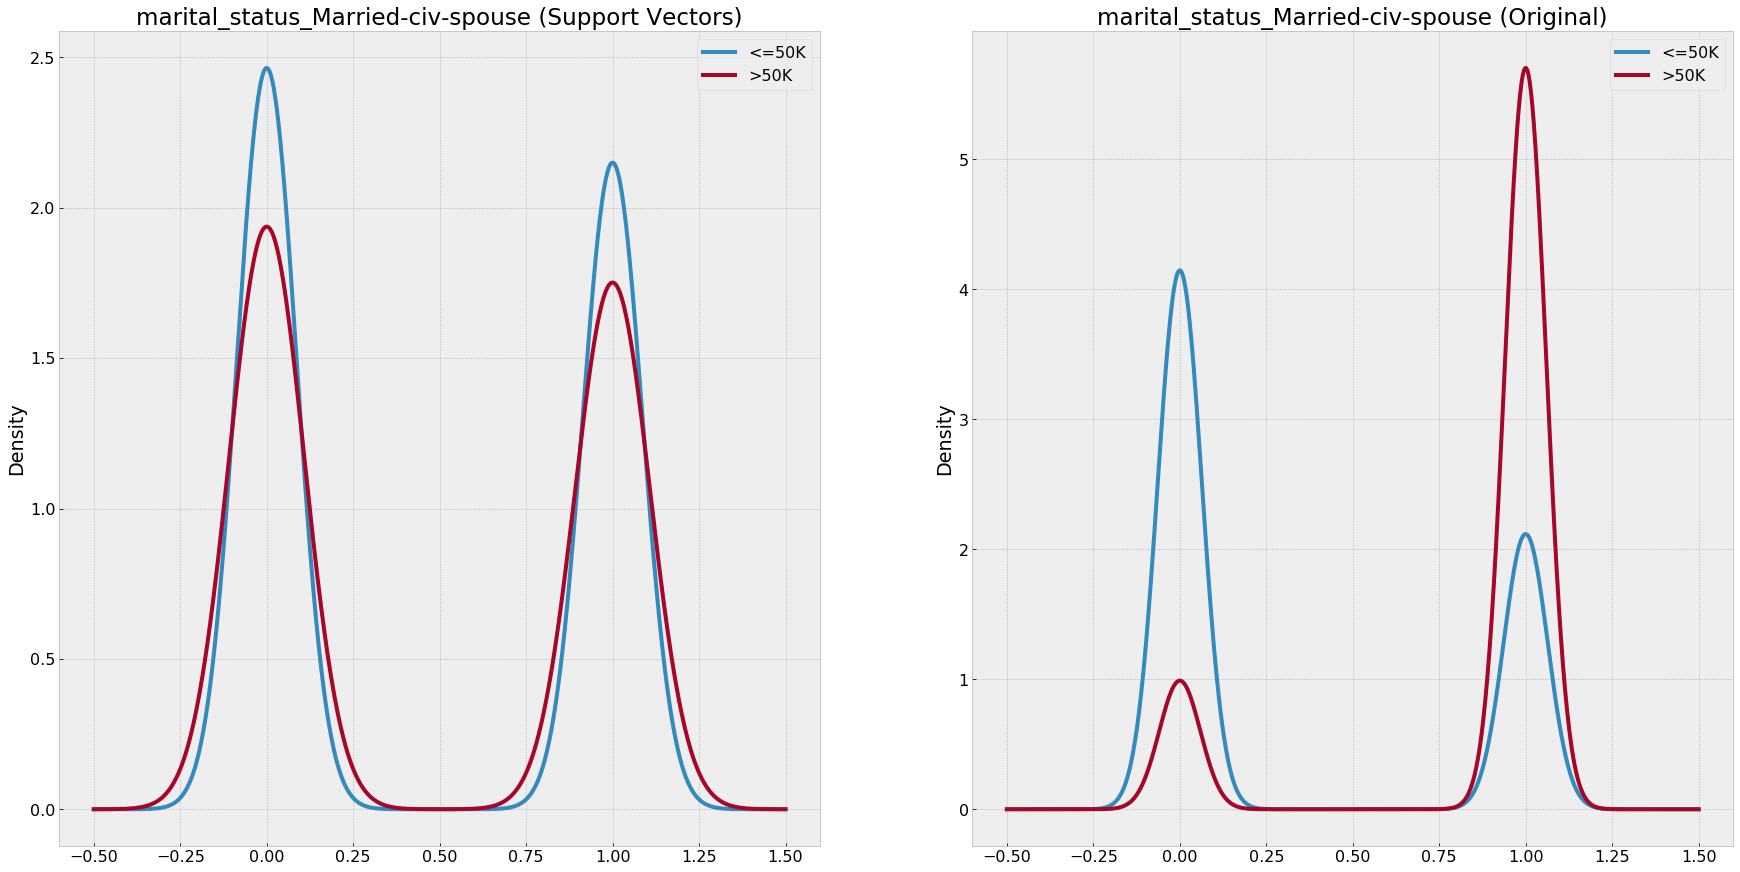

<Figure size 720x288 with 0 Axes>

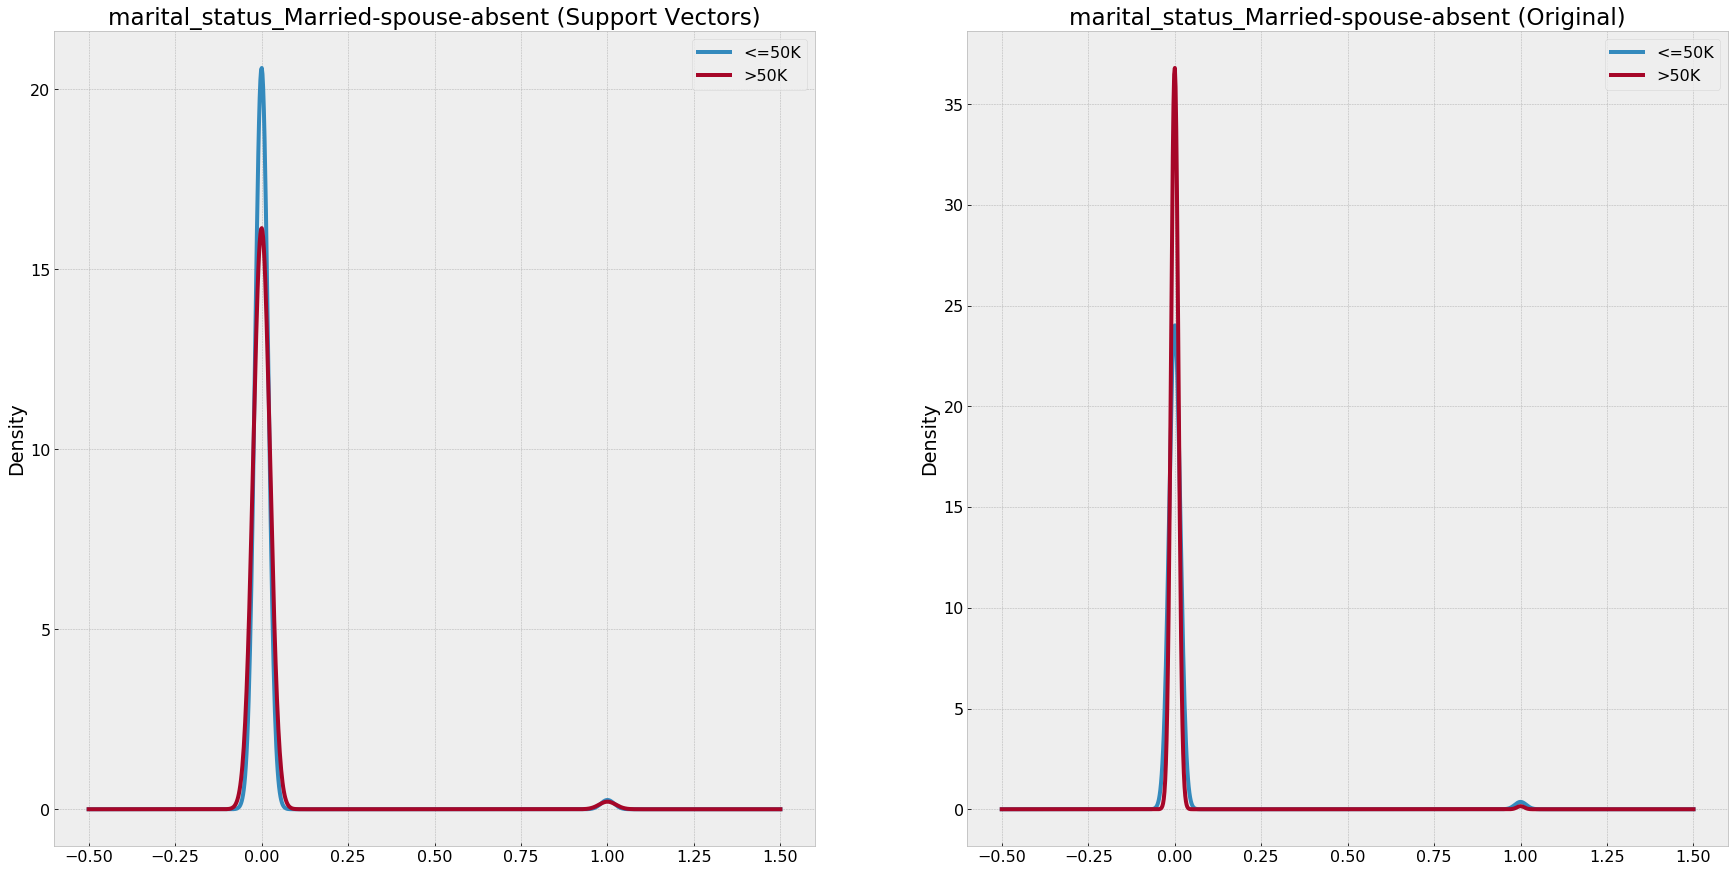

<Figure size 720x288 with 0 Axes>

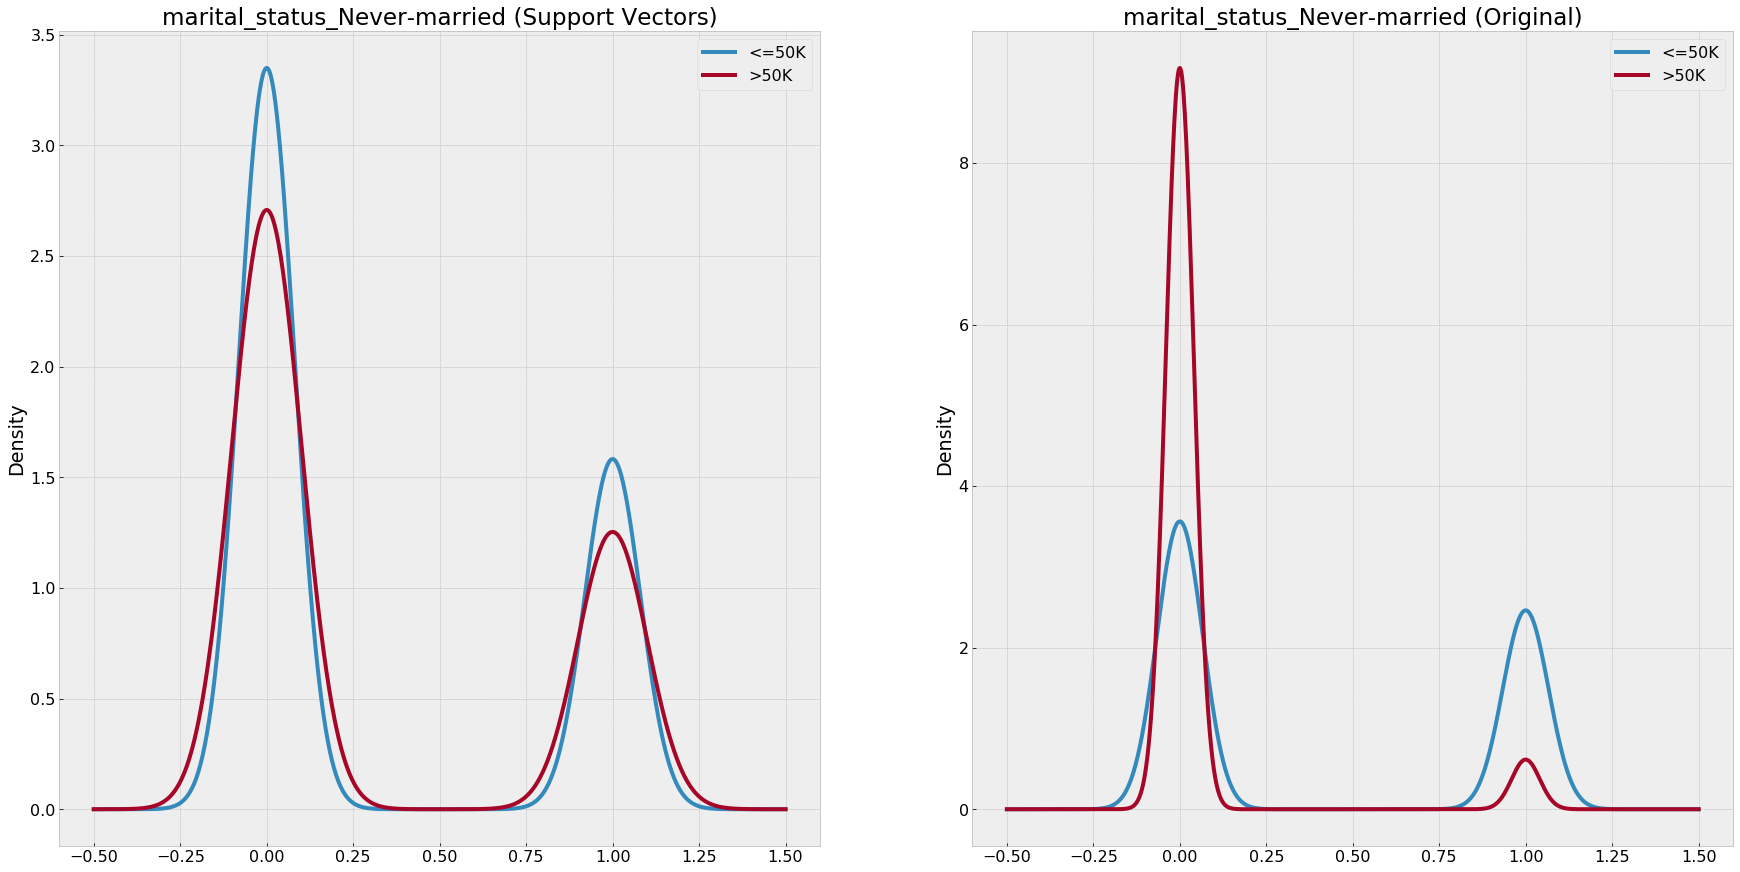

<Figure size 720x288 with 0 Axes>

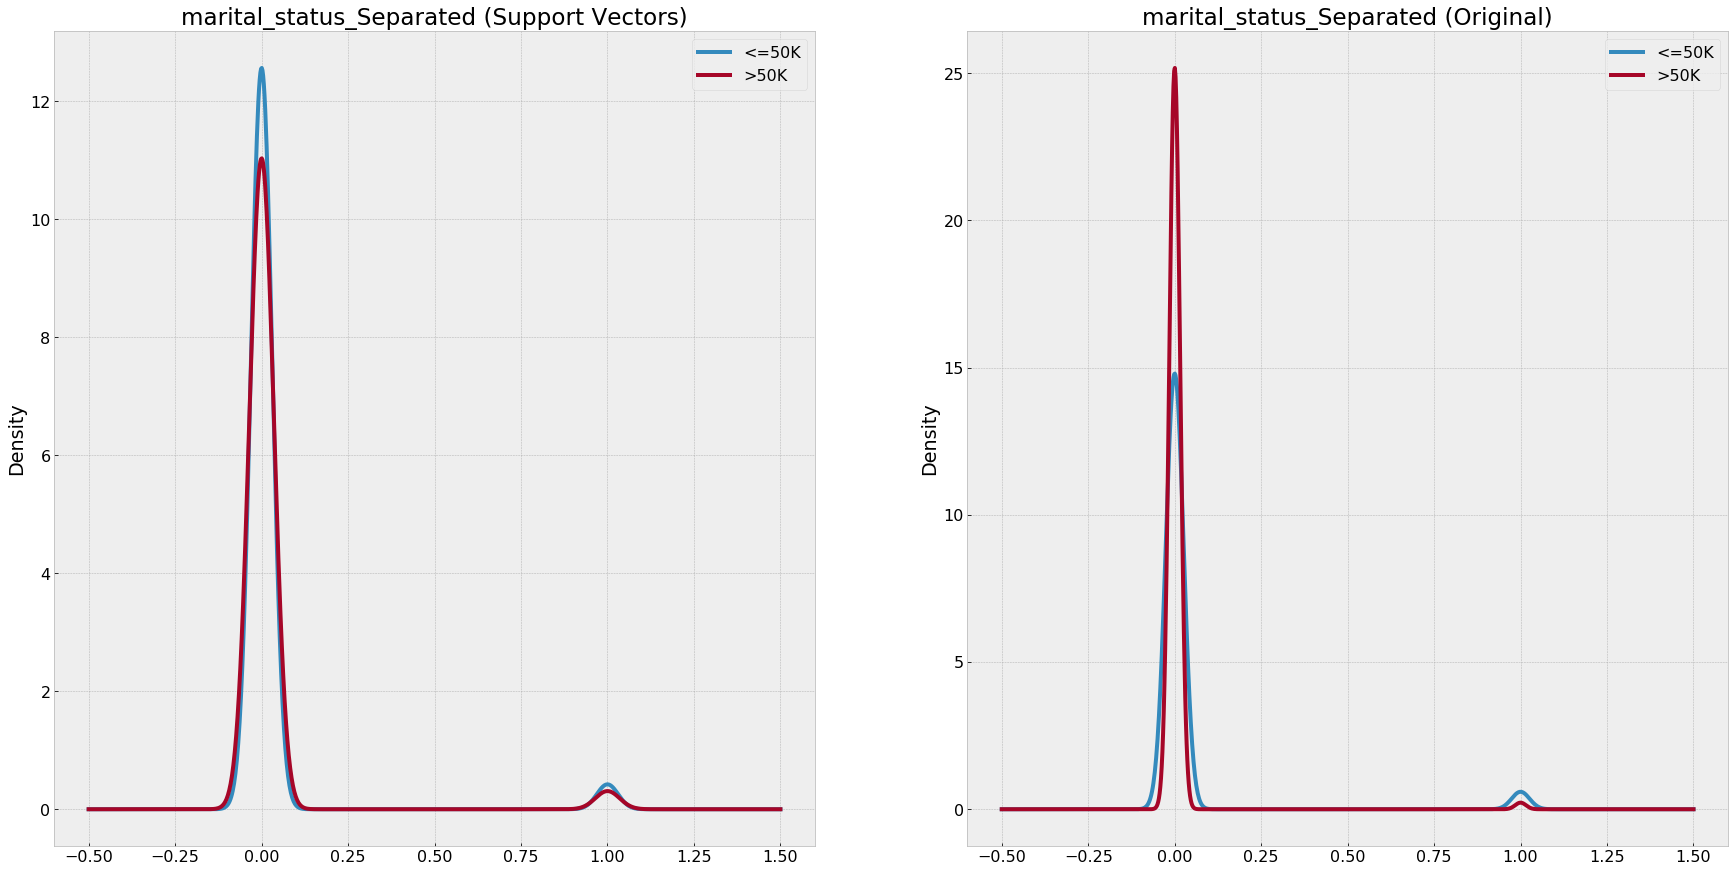

<Figure size 720x288 with 0 Axes>

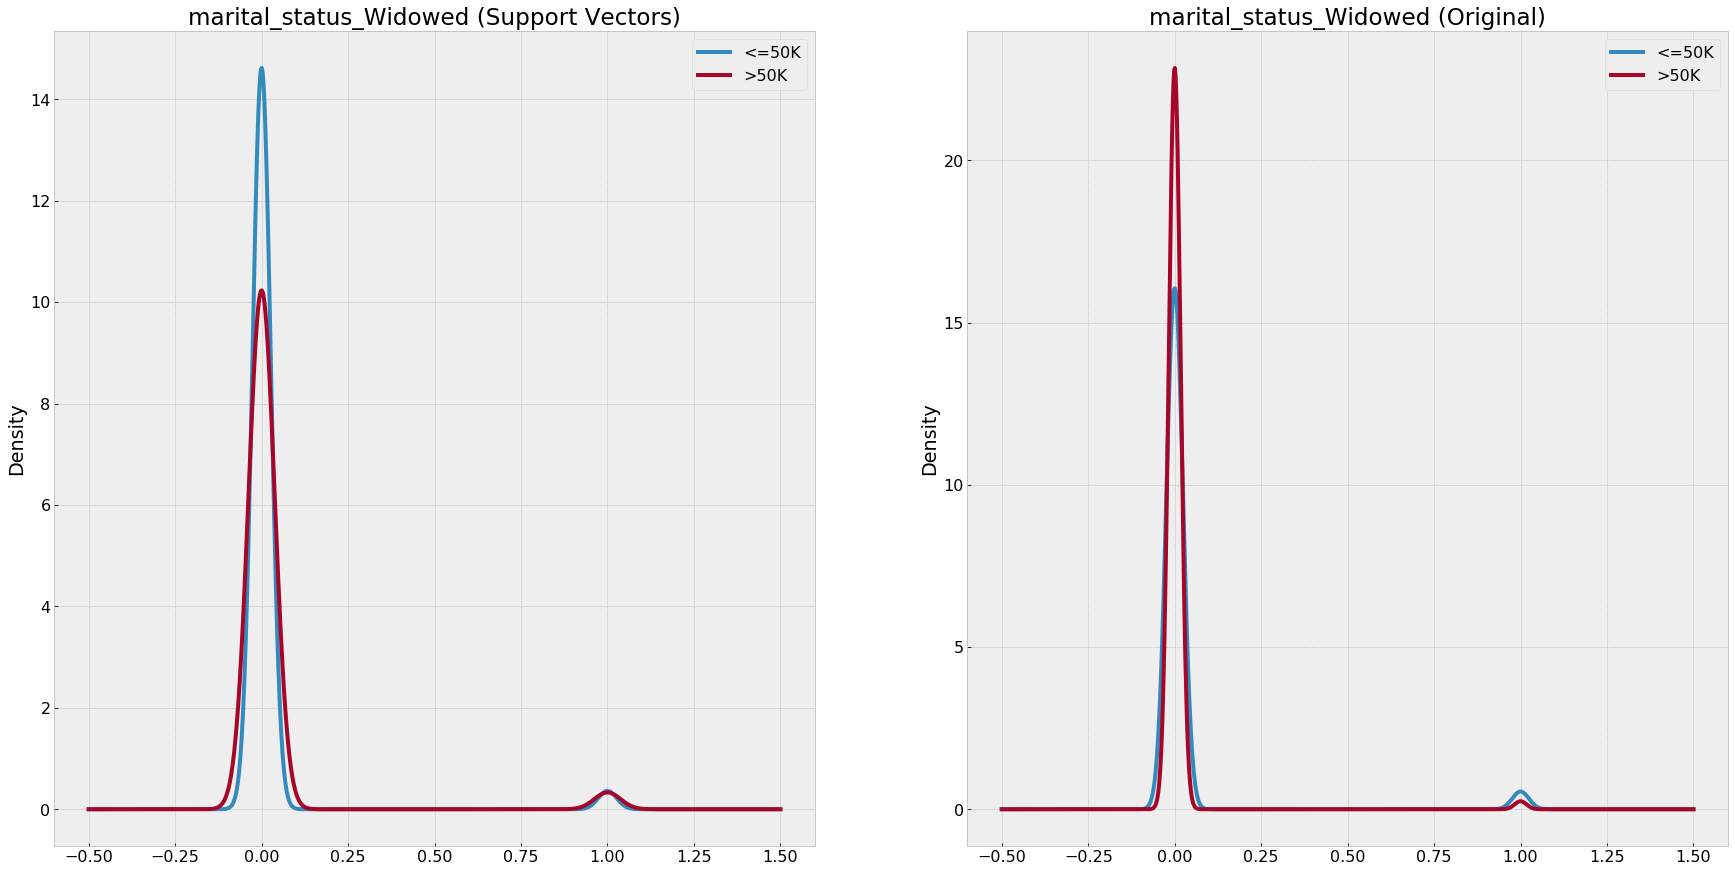

<Figure size 720x288 with 0 Axes>

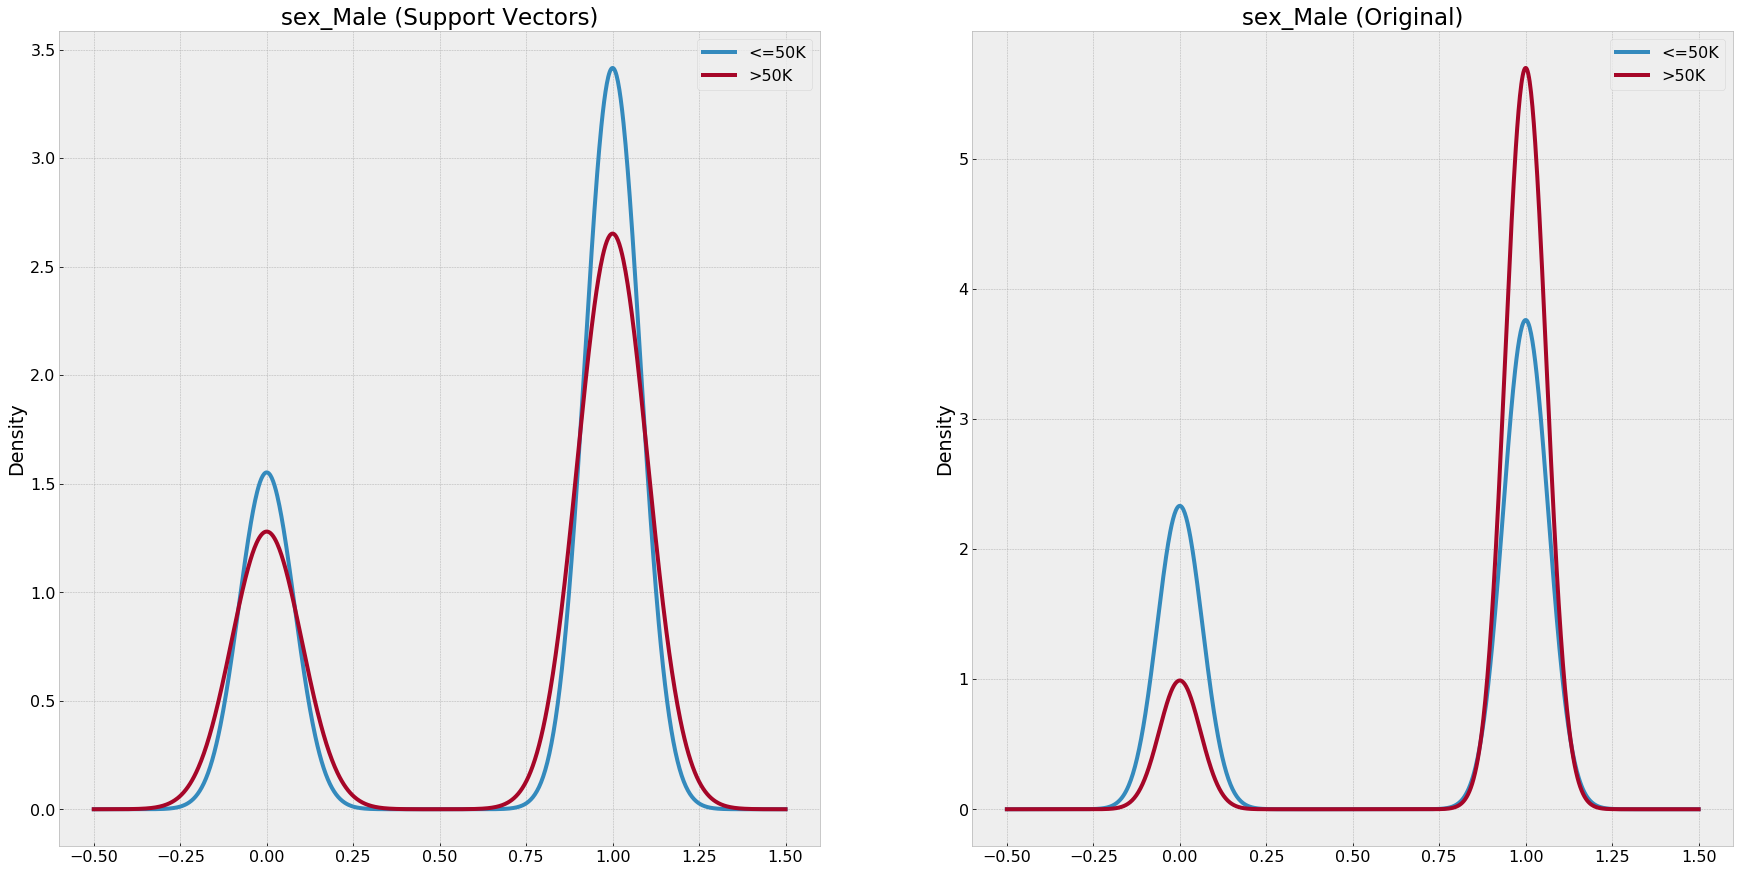

<Figure size 720x288 with 0 Axes>

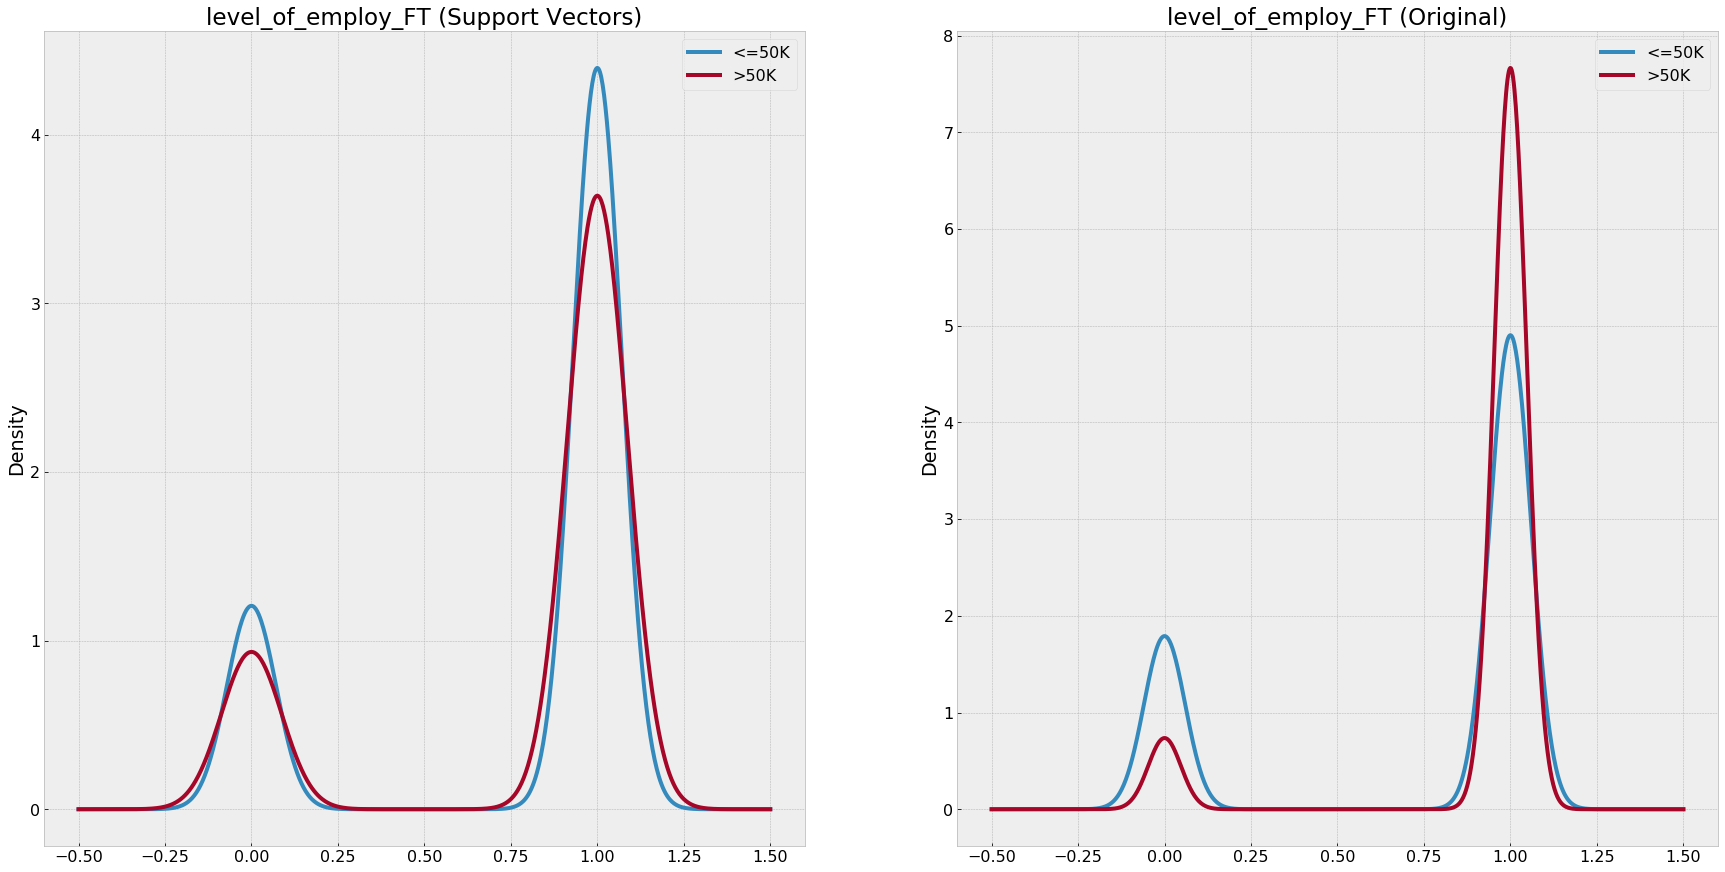

In [21]:
#https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['income_outcome'])
df_grouped = ml_df.groupby(['income_outcome'])

# plot KDE of Different variables
vars_to_plot = ['education_num_yr', 'cap_gain', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'sex_Male', 'level_of_employ_FT']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    plt.figure(figsize=(30,15))
    plt.rcParams.update({'font.size': 16,'lines.linewidth':4})
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Original)')

In [22]:
%%time

from sklearn.linear_model import SGDClassifier

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')


svm_sgd.fit(X_train_scaled,y_train)
yhat = svm_sgd.predict(X_test_scaled)
    
conf = mt.confusion_matrix(y_test,yhat)
acc = mt.accuracy_score(y_test,yhat)

print('SVM:', acc)
print('Confusion Matrix', conf)

SVM: 0.8418952618453865
Confusion Matrix [[4267  276]
 [ 675  797]]
CPU times: user 74.4 ms, sys: 0 ns, total: 74.4 ms
Wall time: 52.9 ms


In [23]:
%%time

log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

log_sgd.fit(X_train_scaled,y_train)
yhat = log_sgd.predict(X_test_scaled)
    
conf = mt.confusion_matrix(y_test,yhat)
acc = mt.accuracy_score(y_test,yhat)

print('Logistic Regression:', acc)
print('Confusion Matrix', conf)

Logistic Regression: 0.8364089775561098
Confusion Matrix [[4296  247]
 [ 737  735]]
CPU times: user 88.6 ms, sys: 90 µs, total: 88.7 ms
Wall time: 70 ms


Rubric Sections

50 PTS Create a logistic regression model and a support vector machine model for the
classification task involved with your dataset. Assess how well each model performs (use
80/20 training/testing split for your data). Adjust parameters of the models to make them more
accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel
only is fine to use.

10 PTS Discuss the advantages of each model for each classification task. Does one type
of model offer superior performance over another in terms of prediction accuracy? In terms of
training time or efficiency? Explain in detail.

30 PTS Use the weights from logistic regression to interpret the importance of different
features for each classification task. Explain your interpretation in detail. Why do you think
some variables are more important?

10 PTS Look at the chosen support vectors for the classification task. Do these provide
any insight into the data? Explain.